# Puzzle 04: Fourier Transforming

## [Overview]

In this exercise, you'll learn about the Fourier transform, a very powerful integral transform used often in physics. The Fourier transform allows changing between variables inversely related to each other - common examples are time & frequency in signal processing and momentum & wave vector (k) in quantum mechanics and thermodynamics. Some resources to learn more follow:

- [Wikepedia - Fourier Transform](https://en.wikipedia.org/wiki/Fourier_transform)
- [Hyperphysics](http://hyperphysics.phy-astr.gsu.edu/hbase/Math/fft.html#c1)

Because integrals are hard to calculate and often time-consuming (even for computers), there is a class of algorithms called *Fast Fourier Transforms* (FFT) that approximate the Fourier transform but run much faster. There are many libraries to do this algorithm, which we'll use here.

- [Wikepedia - FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform)
- [Numpy FFT Documentation](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)

## [The Puzzle]

The answer to this puzzle is hidden in the waveform in `waveform.txt`. It's your job to unscramble it!

In [71]:
# here are the libraries you will need
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

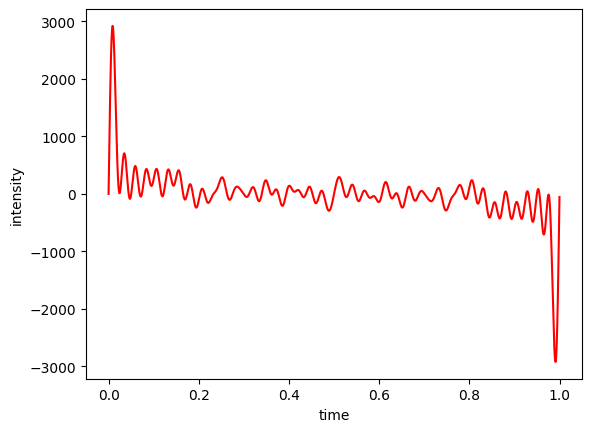

In [84]:
# the wave
x = np.loadtxt('waveform.txt')
# how many data points we have
N = len(x)
# the time series
t = np.arange(N) / N

# plot the waveform
plt.plot(t, x, 'r')
plt.xlabel('time')
plt.ylabel('intensity')
plt.show()

The waveform is shown above, with some helpful variables created and commented. Use the below cells to solve the puzzle!

## [Hints]

### What you're looking for

This waveform is the sum of a whole bunch of sin waves with different frequencies and magnitudes. Each magnitude, ordered by its frequency, represents a letter/character in the url that is the answer.

### How to start

First, you'll want to Fourier transform the waveform! The code below shows an example of making a simple sine wave, then applying an FFT.

_Note_: This code assumes you've already imported libraries above.

In [82]:
# time data
N = 10000
t = np.arange(0, 1, 1/N)

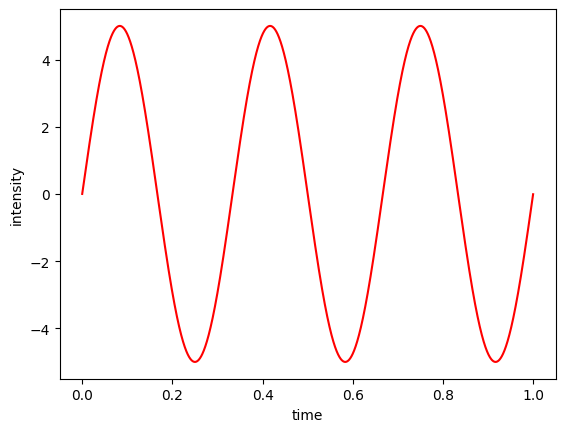

In [83]:
freq = 3
mag = 5
x = mag * np.sin(freq * 2 * np.pi * t)

plt.plot(t, x, 'r')
plt.xlabel('time')
plt.ylabel('intensity')

plt.show()

We'll process this data now by fourier transforming it.

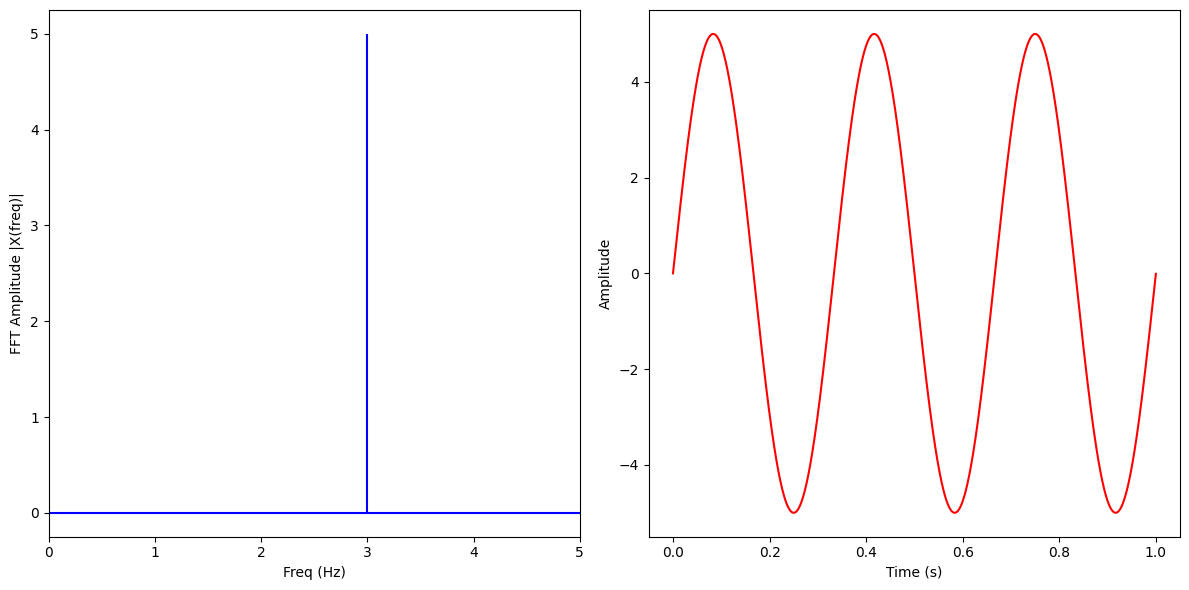

In [80]:
X = fft(x)
N = len(X)
n = np.arange(N)
T = N/dt
freq = n/T

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X) / dt * 2, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 5)

plt.subplot(122)
plt.plot(t, x, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

You can see the original waveform (right) and Fourier transformed function (left). This is a simple spike at 3 with a magnitude of, since that is what the frequency and magnitude of the sine wave. You can try changing those values, and see how the FFT always recovers that value.

### How to get the url from this

Each magnitude in order represents an (ascii code)[https://en.wikipedia.org/wiki/ASCII#Printable_characters]. Take each magnitude in order and convert it to a character using the ascii code, and you'll get the url! You can either convert the values manually, or use more code! Here are some relevant functions:

- `np.abs(X[1]) / dt * 2` - if X is the FFT of the waveform, this will get the magnitude (ascii code) of the first character in the url. If you do it correctly, `X[1] ~= 104`.
- `round(#)` - Round a decimal number to the closest integer. Because of floating point error, the fft won't be exactly an integer.
- `chr(#)` - The character corresponding to an ascii code. For example `chr(104)='h'`.